<a href="https://colab.research.google.com/github/Keerthibalraj/Exploratory-Data-Analysis/blob/main/CAse_study_Video_Games.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Link for Dataset - https://www.kaggle.com/rush4ratio/video-game-sales-with-ratings

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data_df = pd.read_csv('/content/Video_Games_Sales_as_at_22_Dec_2016.csv')

In [3]:
data_df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')

In [4]:
data_df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [6]:
data_df['User_Score']

0          8
1        NaN
2        8.3
3          8
4        NaN
        ... 
16714    NaN
16715    NaN
16716    NaN
16717    NaN
16718    NaN
Name: User_Score, Length: 16719, dtype: object

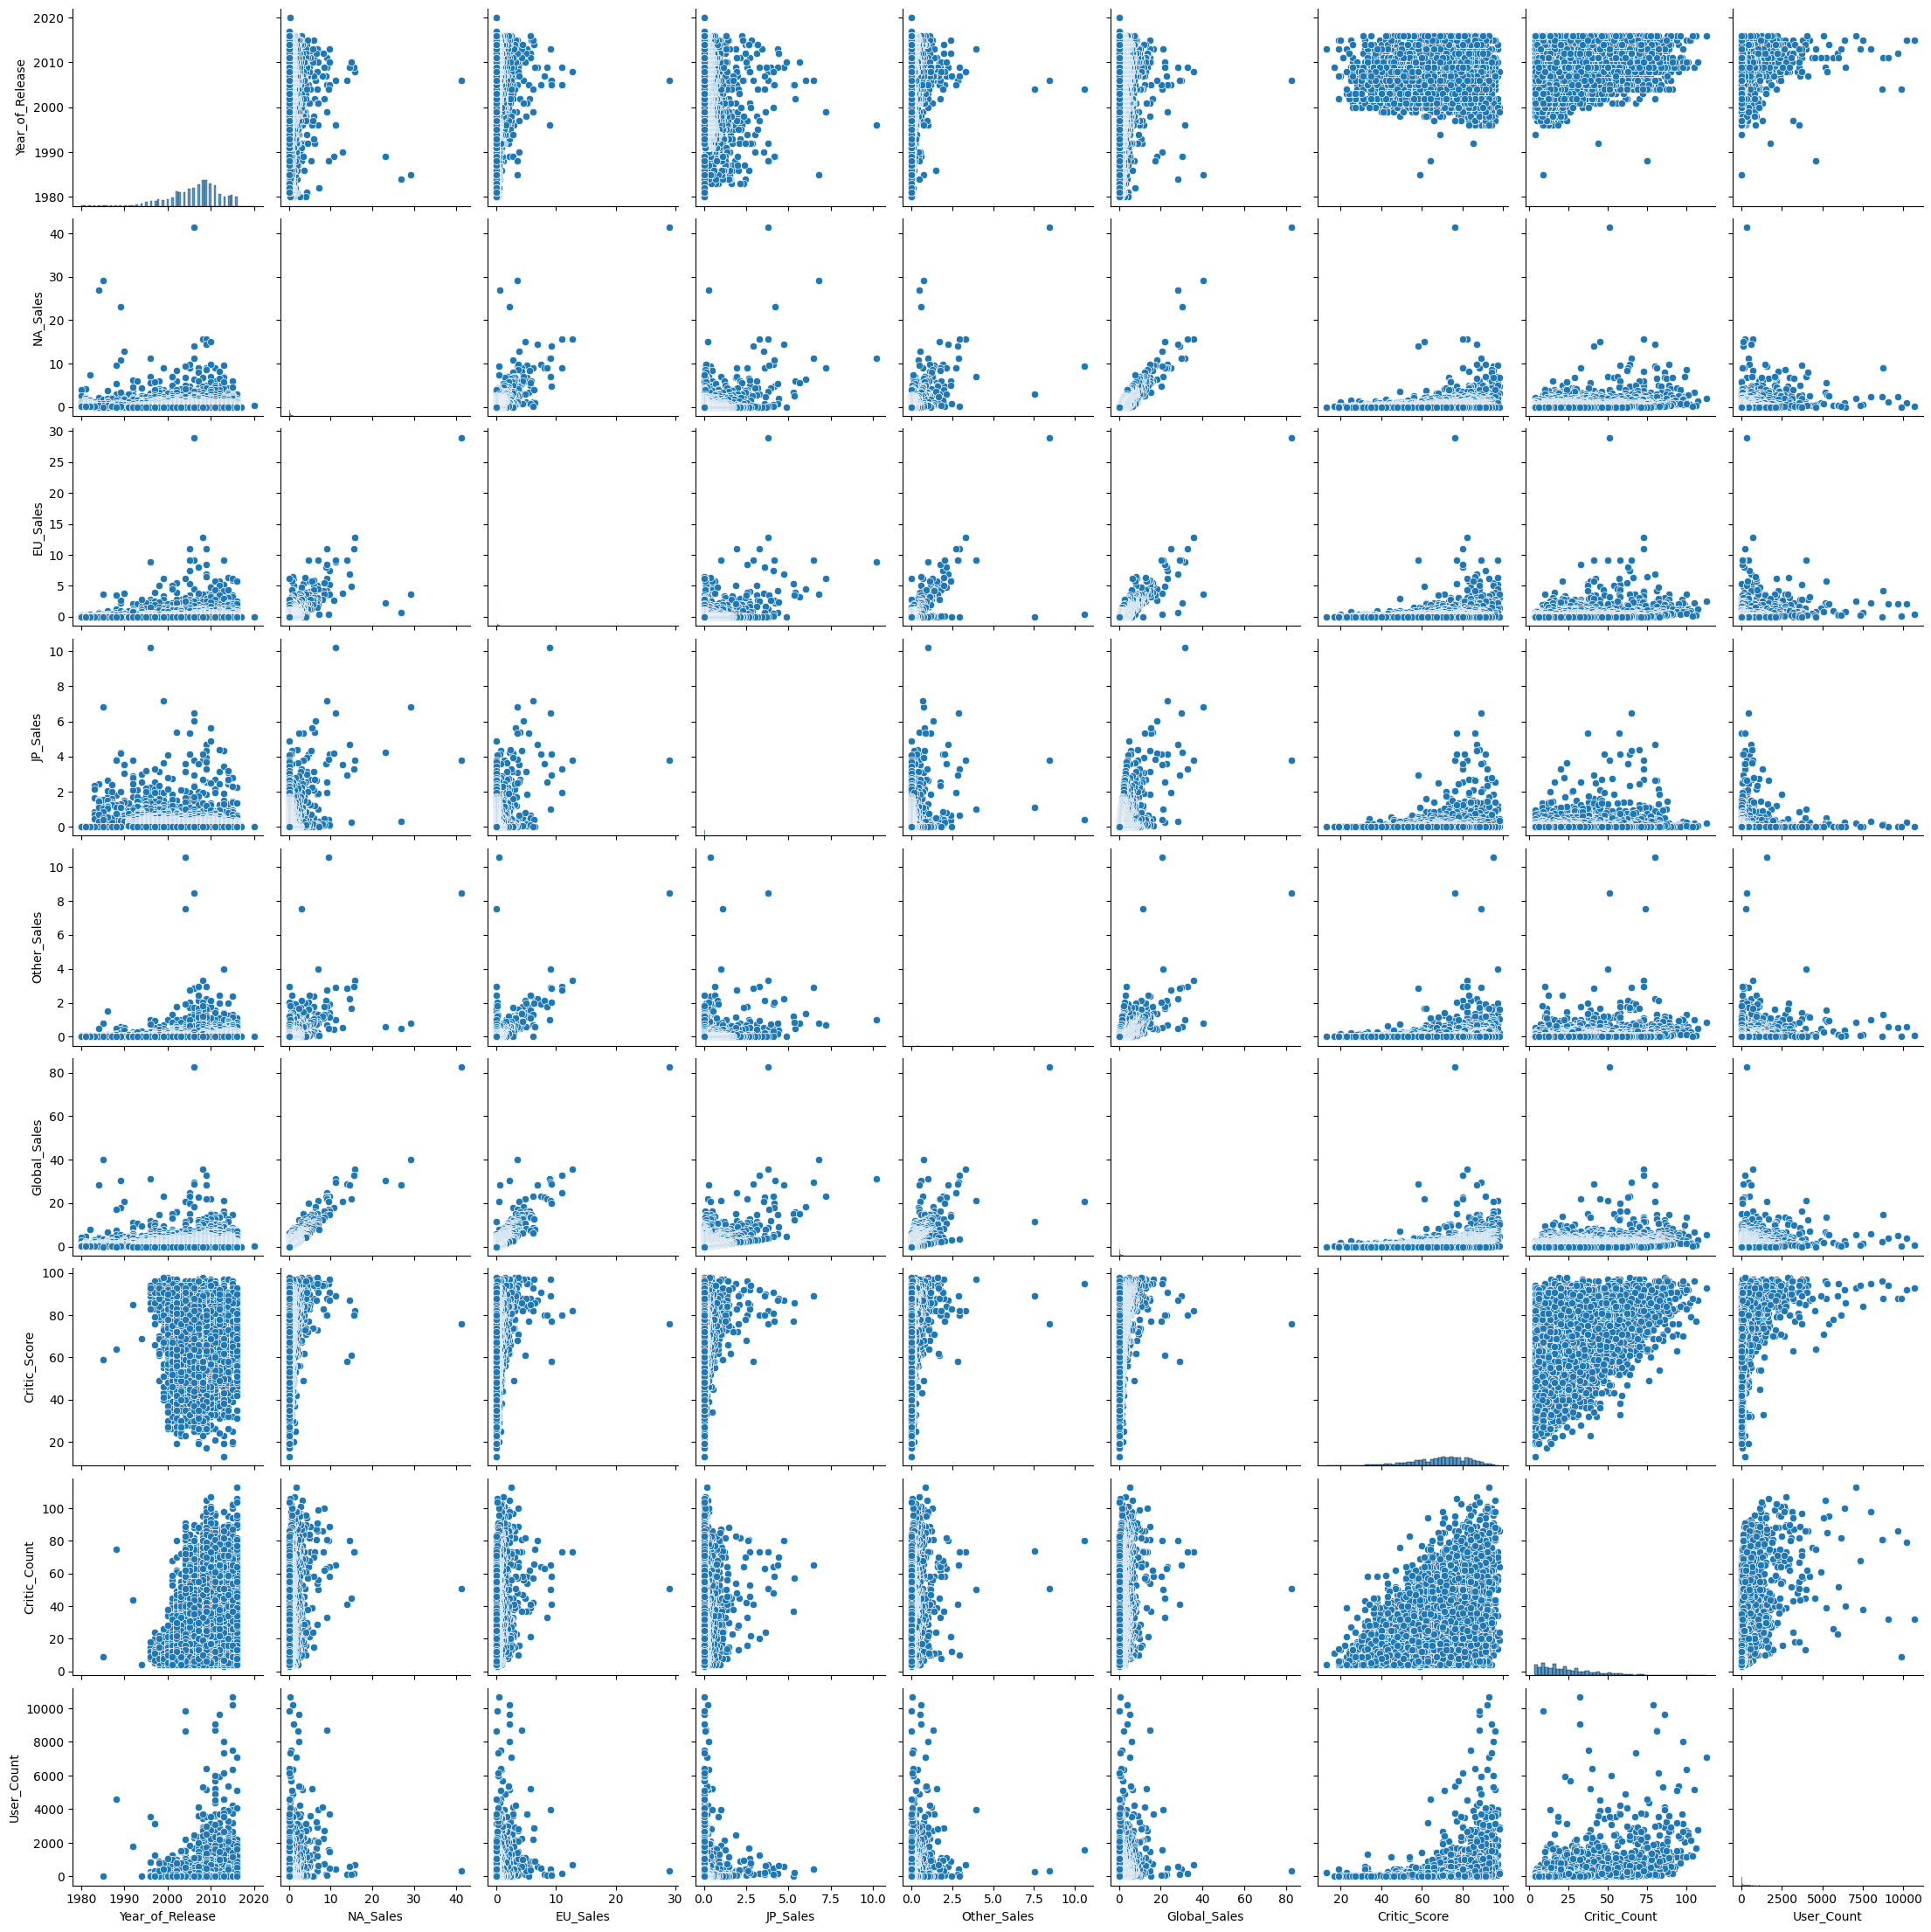

In [7]:
sns.pairplot(data_df)

<ipython-input-8-bbfa9f9e0b5b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data_df.corr(), annot=True, fmt='.2f')


<Axes: >

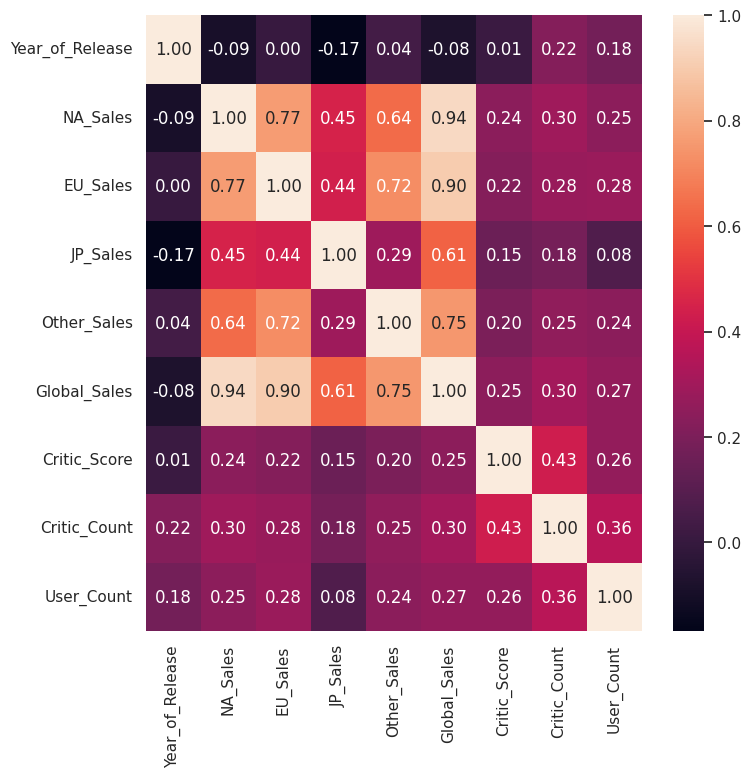

In [8]:
sns.set(rc={'figure.figsize':(8,8)})
sns.heatmap(data_df.corr(), annot=True, fmt='.2f')

<Axes: >

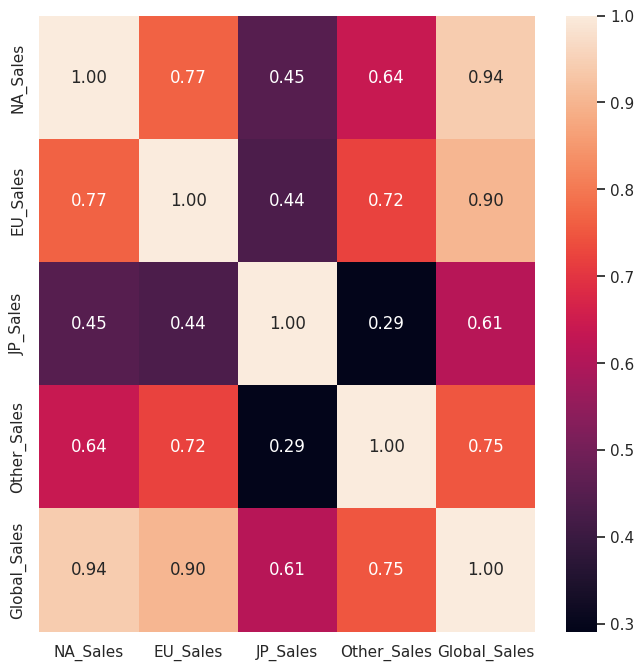

In [9]:
sns.heatmap(data_df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].corr(),
           annot=True, fmt='.2f')

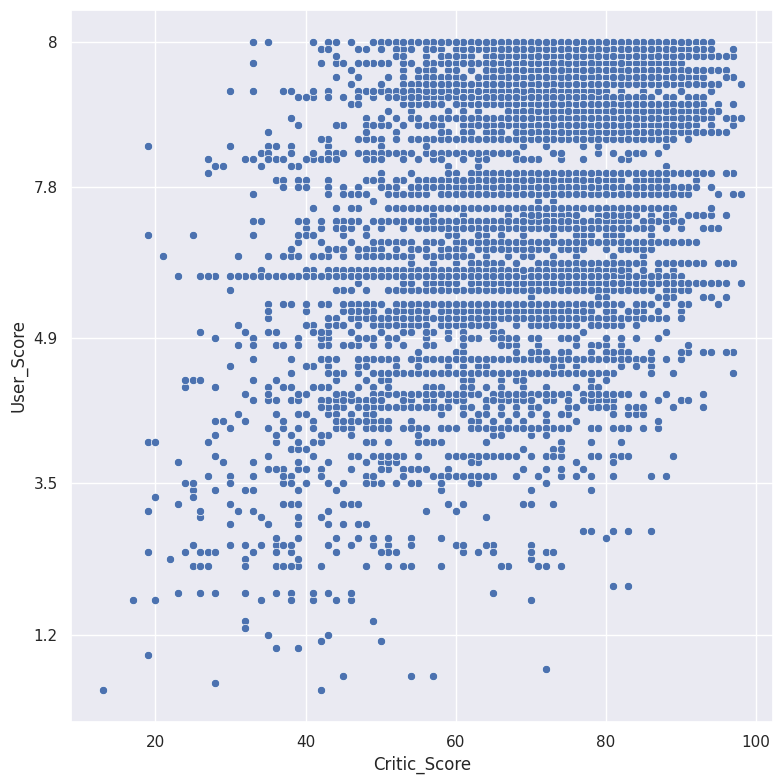

In [10]:
ax =sns.scatterplot(x=data_df['Critic_Score'], y=data_df['User_Score'])
ymin, ymax = ax.get_ylim()
ax.set_yticks(np.round(np.linspace(ymin, ymax, 25, 2)))
plt.tight_layout()
plt.locator_params(axis='y', nbins=6)
plt.show()

In [11]:
score_df = data_df[['Critic_Score', 'User_Score']]
score_df = score_df[score_df['User_Score']!='tbd']
score_df['User_Score'] = pd.to_numeric(score_df['User_Score'], errors='coerce')
score_df.dropna(how='any', inplace=True)

In [12]:
score_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7017 entries, 0 to 16709
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Critic_Score  7017 non-null   float64
 1   User_Score    7017 non-null   float64
dtypes: float64(2)
memory usage: 164.5 KB


<Axes: xlabel='Critic_Score', ylabel='User_Score'>

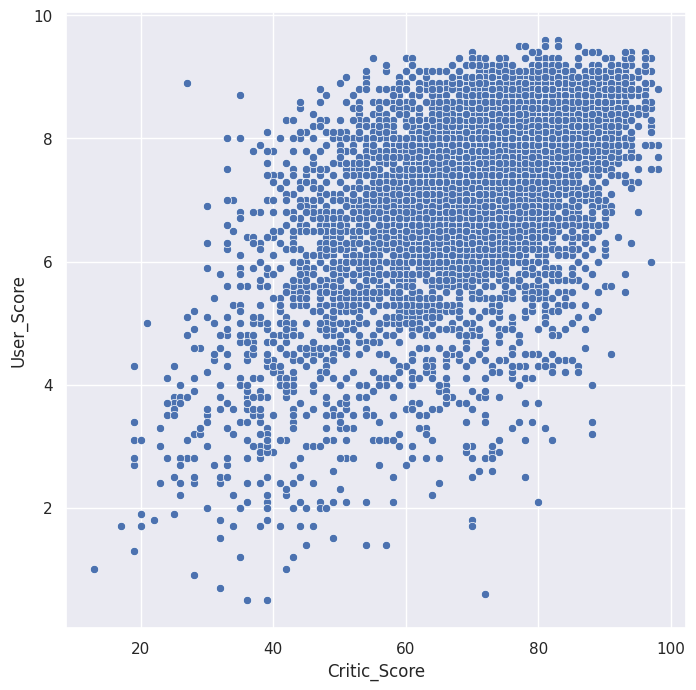

In [13]:
sns.scatterplot(x=score_df['Critic_Score'], y=score_df['User_Score'])

In [14]:
score_df.corr()

,Critic_Score,User_Score
Critic_Score,1.000000,0.580878
User_Score,0.580878,1.000000


In [15]:
score_df.corr(method='spearman')

,Critic_Score,User_Score
Critic_Score,1.000000,0.536182
User_Score,0.536182,1.000000


<Axes: xlabel='Genre'>

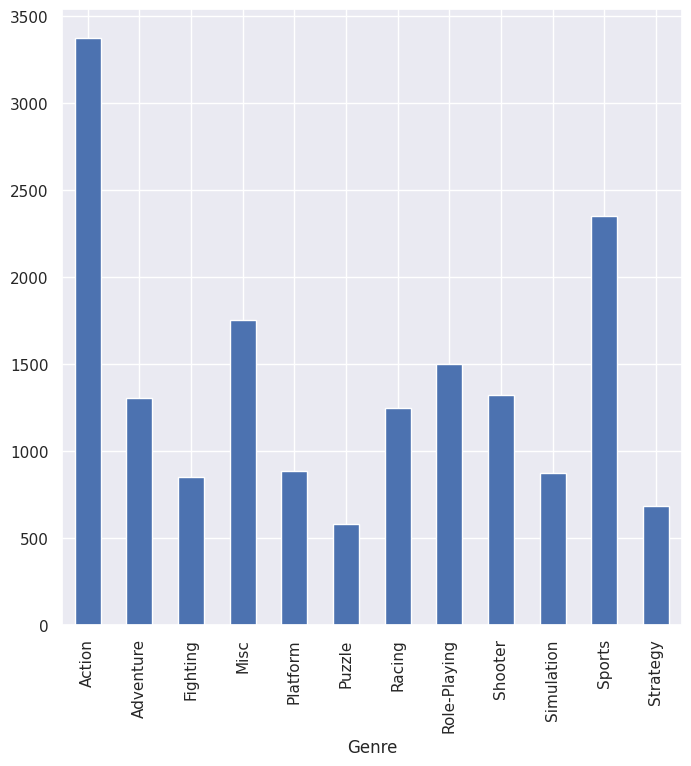

In [16]:
genre_group = data_df.groupby('Genre').size()
genre_group.plot.bar()

In [17]:
data_df['Rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

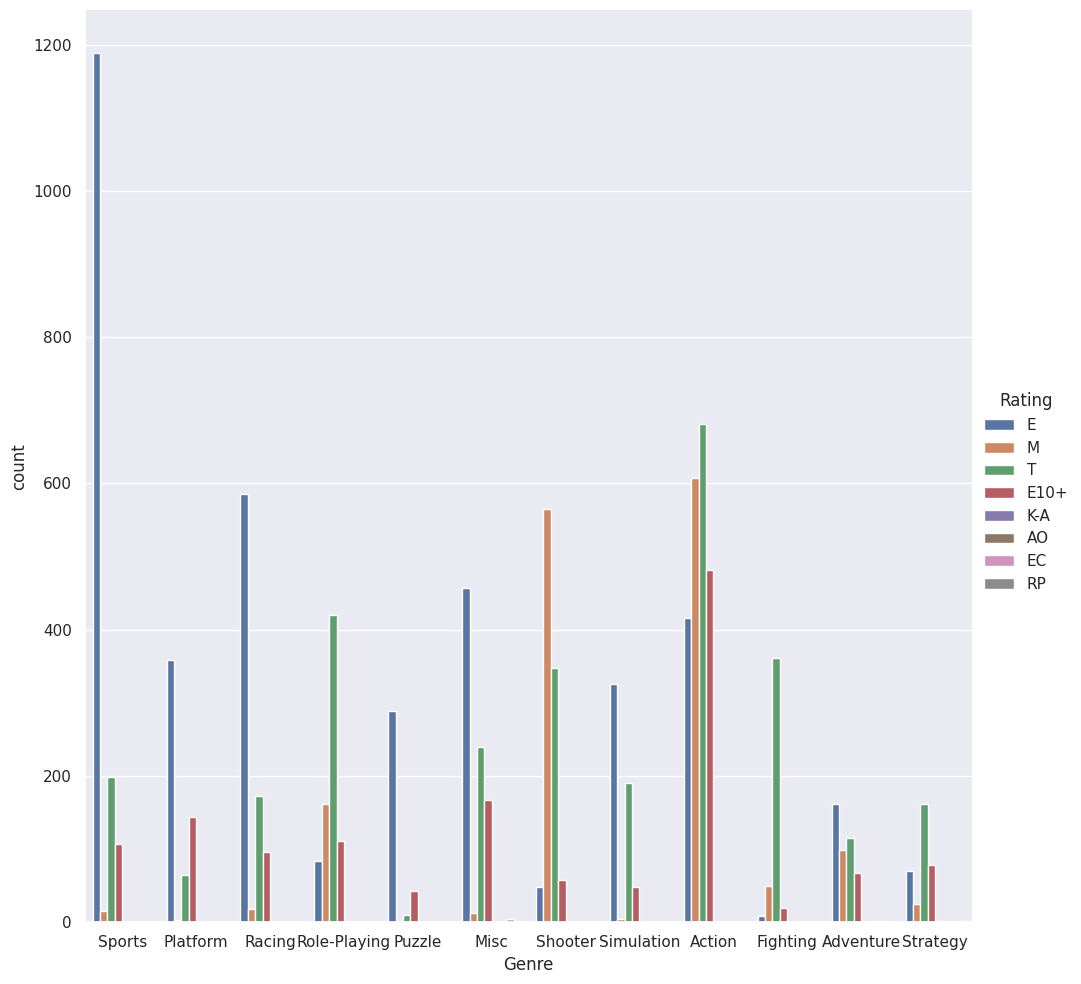

In [18]:
g = sns.catplot(x="Genre", hue="Rating",
                 data=data_df, kind="count",
                 height=10);

In [19]:
count_year_gen = pd.DataFrame({'count' : data_df.groupby( [ "Genre", "Year_of_Release"] ).size()}).reset_index()
print(data_df.groupby( [ "Genre", "Year_of_Release"] ).size())

Genre     Year_of_Release
Action    1980.0              1
          1981.0             25
          1982.0             18
          1983.0              7
          1984.0              1
                             ..
Strategy  2012.0             15
          2013.0             19
          2014.0              8
          2015.0             16
          2016.0             13
Length: 390, dtype: int64


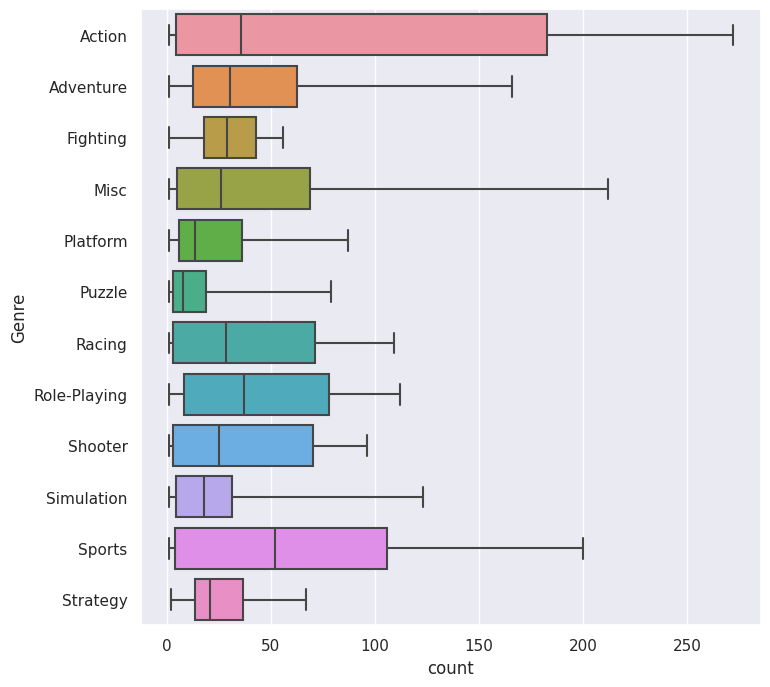

In [20]:
ax = sns.boxplot(x="count", y="Genre", data=count_year_gen, whis=np.inf)

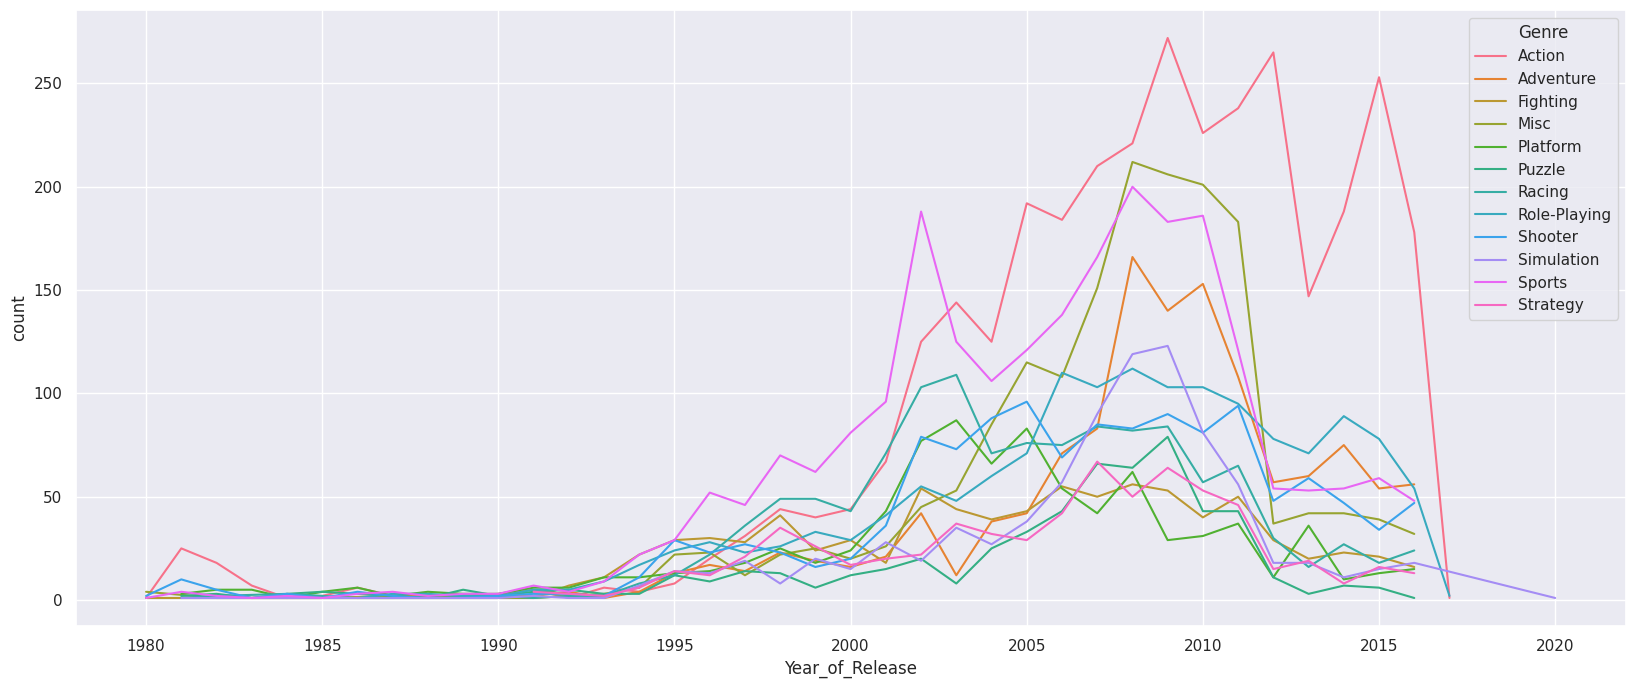

In [21]:
sns.set(rc={'figure.figsize':(20,8)})
ax = sns.lineplot(x="Year_of_Release", y="count", hue="Genre",data=count_year_gen)

### Code modified from : https://bokeh.pydata.org/en/latest/docs/user_guide/interaction/legends.html

In [23]:
from bokeh.palettes import Spectral11
from bokeh.plotting import figure, output_file, show
from bokeh.models import Legend, LegendItem
p = figure(plot_width=800, plot_height=550)
p.background_fill_color = "beige"

p.title.text = 'Click on legend entries to hide the corresponding lines'
import random
legend_list = []
for genre_id in count_year_gen['Genre'].unique():
    color = random.choice(Spectral11)
    df = pd.DataFrame(count_year_gen[count_year_gen['Genre']==genre_id])
    p.line(df['Year_of_Release'], df['count'], line_width=2, alpha=0.8, color=color, legend=genre_id)

p.legend.location = "top_left"
p.legend.click_policy="hide"

show(p)

AttributeError: unexpected attribute 'plot_width' to figure, similar attributes are outer_width, width or min_width

## Sales per Genre per region

<Axes: xlabel='Genre', ylabel='Sales'>

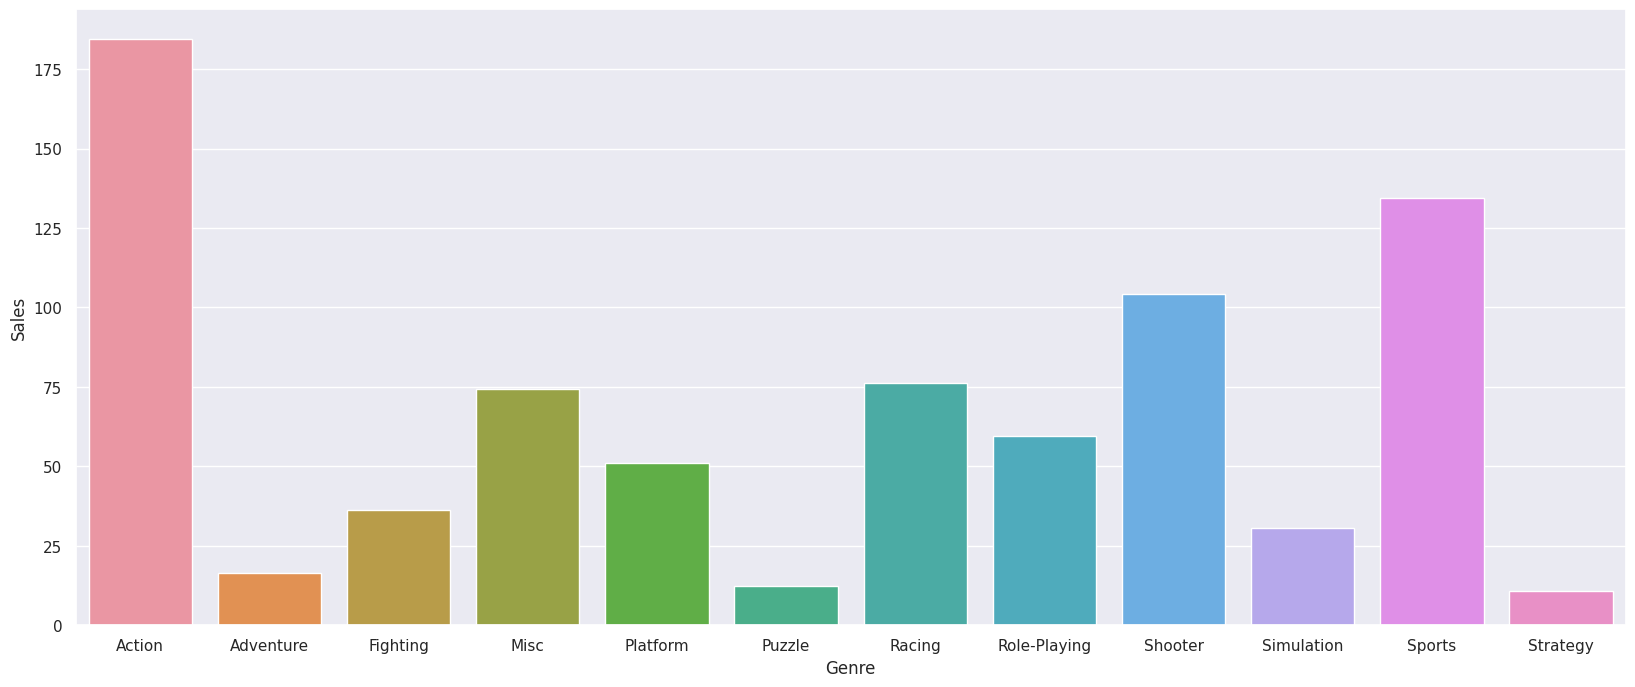

In [24]:
genre_region_other = pd.DataFrame({'Sales' : data_df.groupby("Genre")['Other_Sales'].sum()}).reset_index()
sns.barplot(x='Genre',y='Sales', data=genre_region_other)

<Axes: xlabel='Genre', ylabel='Sales'>

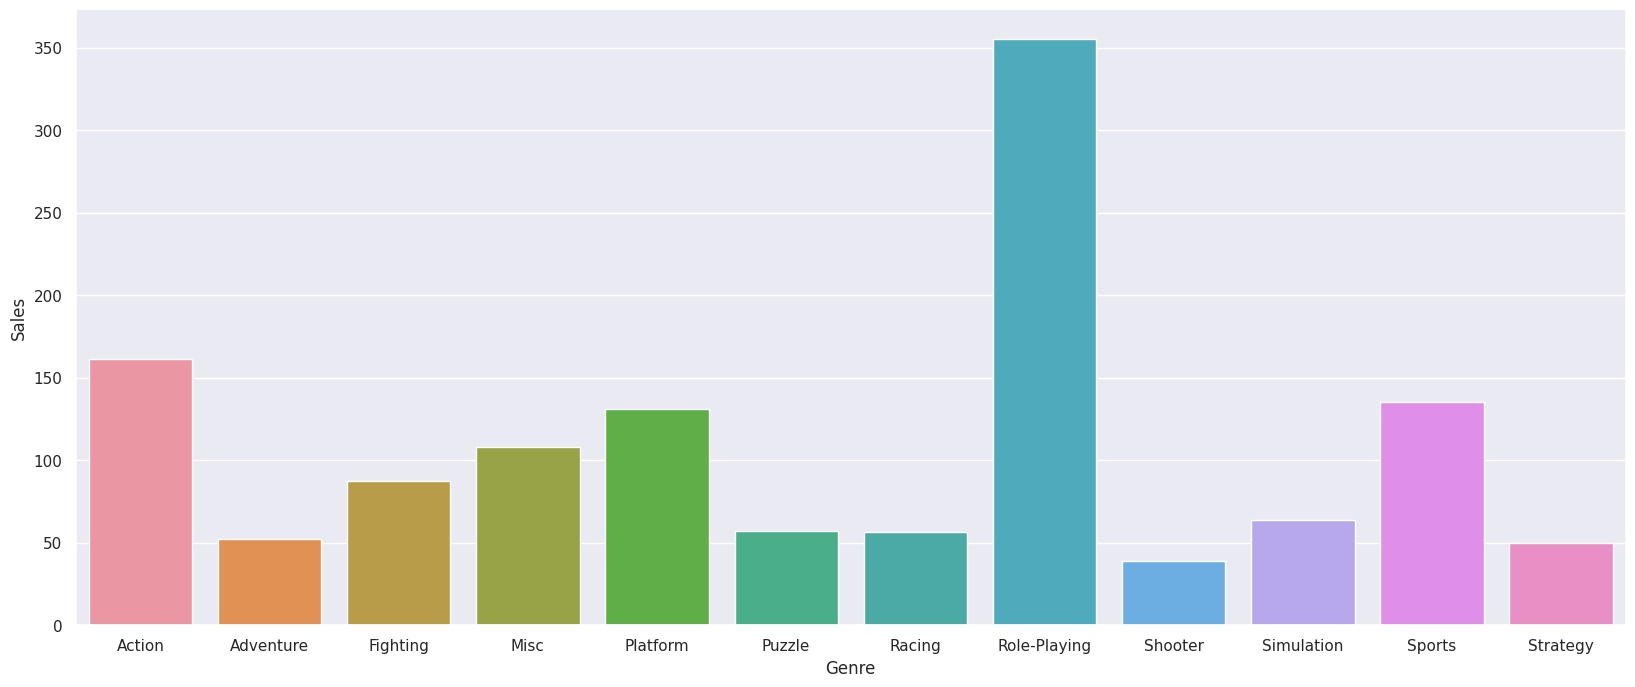

In [25]:
genre_region_jp = pd.DataFrame({'Sales' : data_df.groupby("Genre")['JP_Sales'].sum()}).reset_index()
sns.barplot(x='Genre',y='Sales', data=genre_region_jp)

<Axes: xlabel='Genre', ylabel='Sales'>

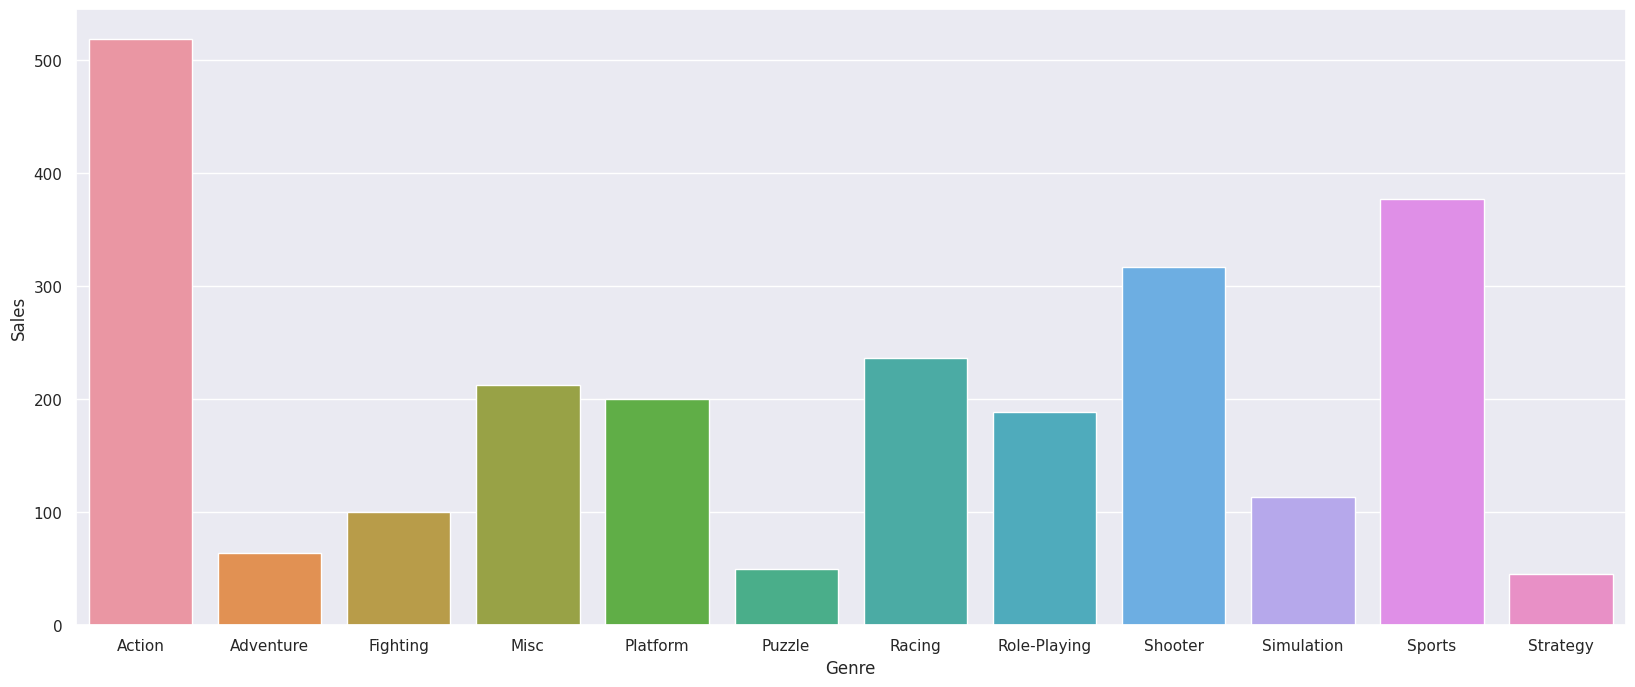

In [26]:
genre_region_eu = pd.DataFrame({'Sales' : data_df.groupby("Genre")['EU_Sales'].sum()}).reset_index()
sns.barplot(x='Genre',y='Sales', data=genre_region_eu)

<Axes: xlabel='Genre', ylabel='Sales'>

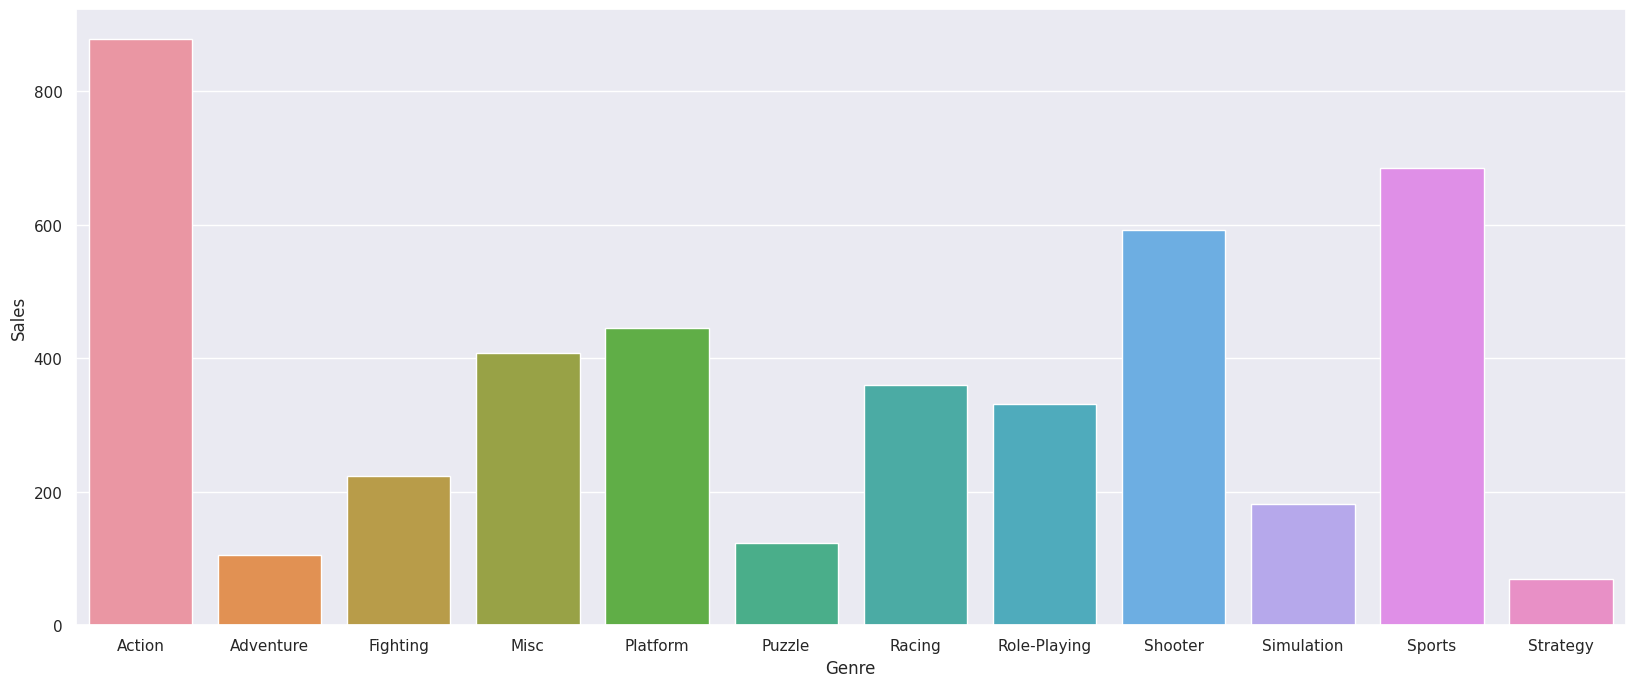

In [27]:
genre_region_na = pd.DataFrame({'Sales' : data_df.groupby("Genre")['NA_Sales'].sum()}).reset_index()
sns.barplot(x='Genre',y='Sales', data=genre_region_na)

In [28]:
platform_group = pd.DataFrame({'count' : data_df.groupby( [ "Platform", "Year_of_Release"] ).size()}).reset_index()
print(data_df.groupby( [ "Platform", "Year_of_Release"] ).size())

Platform  Year_of_Release
2600      1980.0              9
          1981.0             46
          1982.0             36
          1983.0             11
          1984.0              1
                             ..
XB        2008.0              1
XOne      2013.0             19
          2014.0             61
          2015.0             80
          2016.0             87
Length: 241, dtype: int64


In [ ]:
p = figure(plot_width=1200, plot_height=850)
p.background_fill_color = "beige"

p.title.text = 'Click on legend entries to hide the corresponding lines'
import random
legend_list = []
for platform_id in platform_group['Platform'].unique():
    color = random.choice(Spectral11)
    df = pd.DataFrame(platform_group[platform_group['Platform']==platform_id])
    p.line(df['Year_of_Release'], df['count'], line_width=2, alpha=0.8, color=color, legend=platform_id)

p.legend.location = "top_left"
p.legend.click_policy="hide"

show(p)

<Axes: xlabel='Genre', ylabel='Score'>

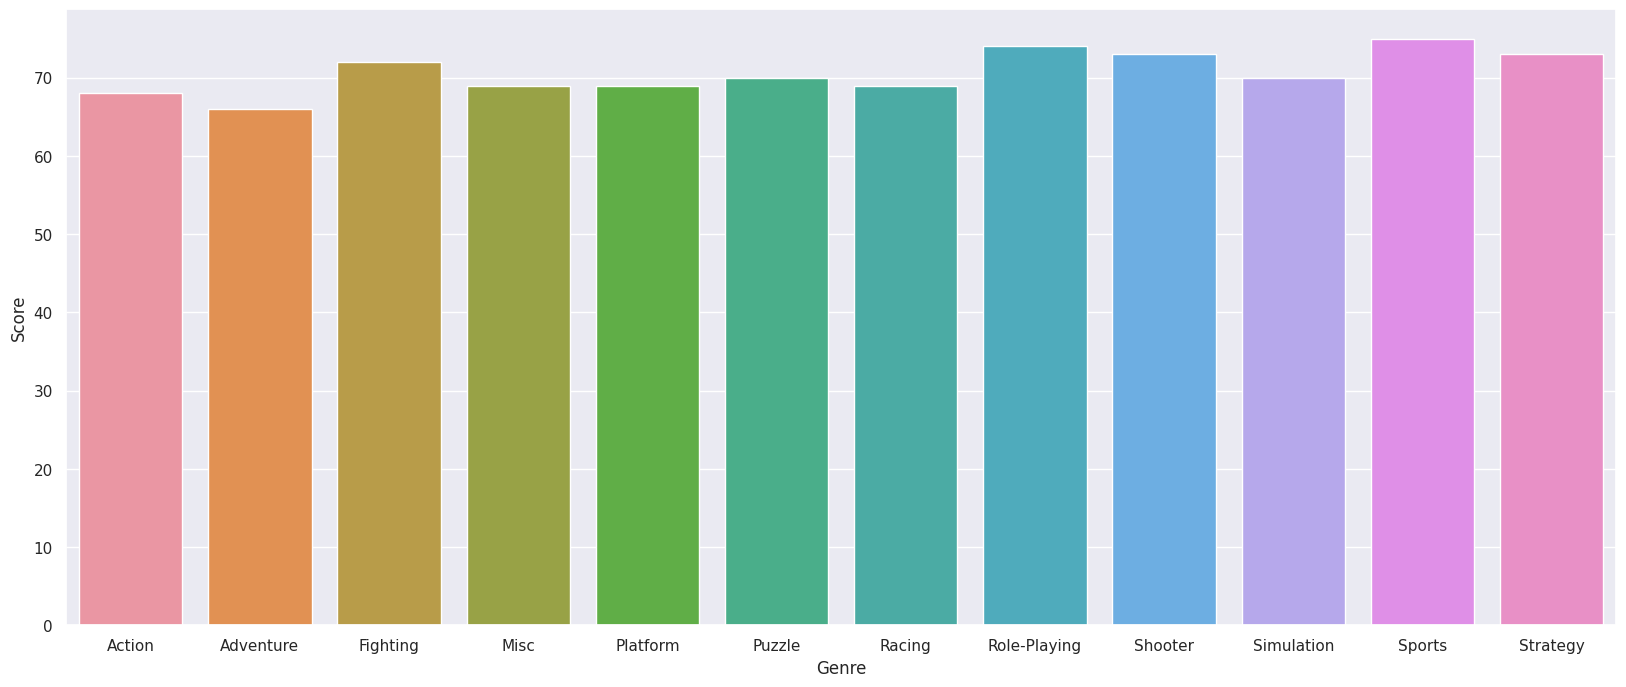

In [31]:
critic_genre_score = pd.DataFrame({'Score' : data_df.groupby("Genre")['Critic_Score'].median()}).reset_index()
sns.barplot(x='Genre',y='Score', data=critic_genre_score)

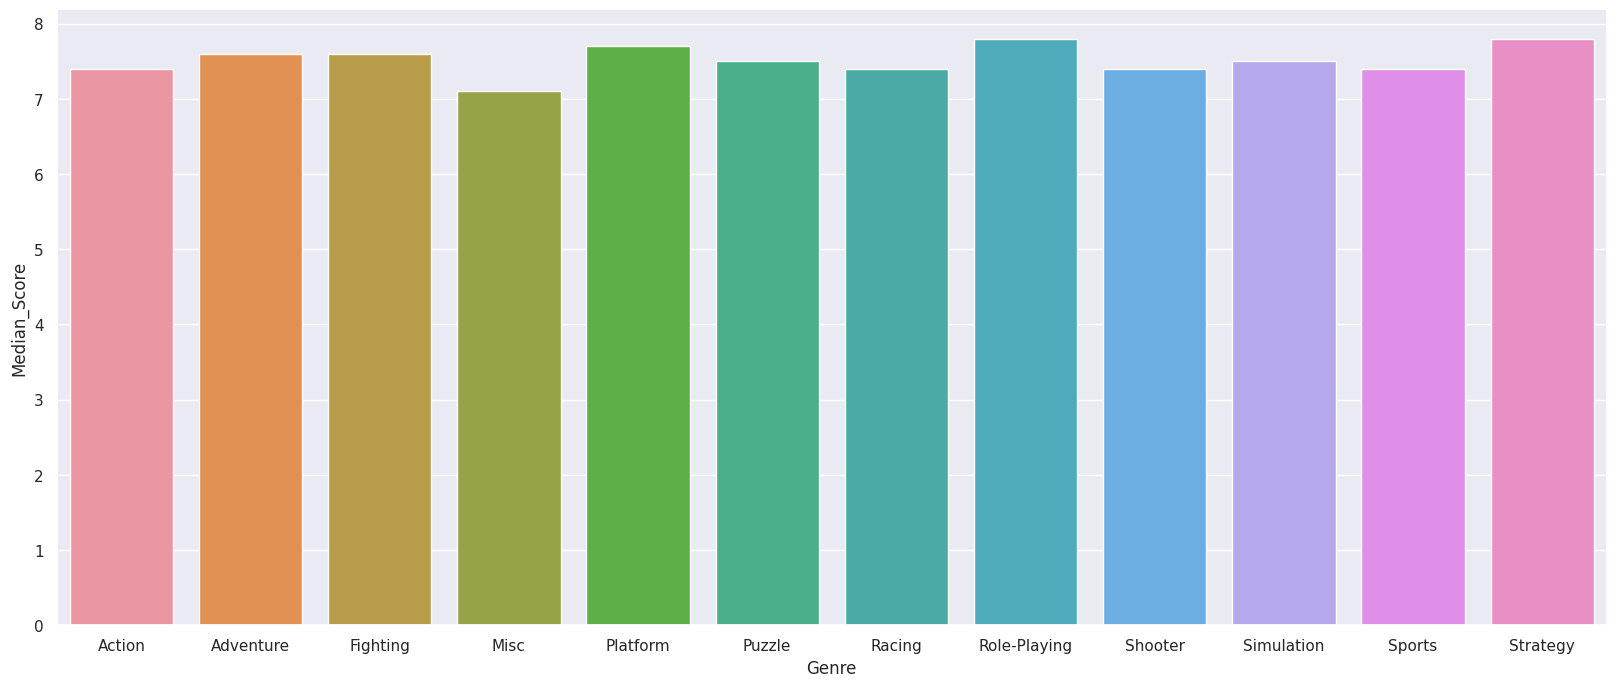

In [32]:
user_score_df = data_df[['Genre', 'User_Score']]
user_score_df = user_score_df[user_score_df['User_Score']!='tbd']
user_score_df['User_Score'] = pd.to_numeric(user_score_df['User_Score'], errors='coerce')
user_genre_df = pd.DataFrame({'Median_Score' : user_score_df.groupby("Genre")['User_Score'].median()}).reset_index()
ax = sns.barplot(x='Genre',y='Median_Score', data=user_genre_df)


In [33]:
data_df.groupby('Genre')['Publisher'].apply(lambda x: x.value_counts().index[0])

Genre
Action                  Activision
Adventure             Idea Factory
Fighting        Namco Bandai Games
Misc                       Ubisoft
Platform                  Nintendo
Puzzle                    Nintendo
Racing             Electronic Arts
Role-Playing    Namco Bandai Games
Shooter                 Activision
Simulation                 Ubisoft
Sports             Electronic Arts
Strategy        Namco Bandai Games
Name: Publisher, dtype: object